# Analyze seqFISH data

In [2]:
%matplotlib inline

In [3]:
!pip install --q squidpy

In [4]:
import numpy as np

import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.seqfish()

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13
squidpy==1.6.0


In [5]:
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

In [6]:
adata.to_df()

,Abcc4,Acp5,Acvr1,Acvr2a,Adora2b,Afp,Ahnak,Akr1c19,Alas2,Aldh1a2,...,Wnt2b,Wnt3,Wnt3a,Wnt5a,Wnt5b,Wnt8a,Xist,Zfp444,Zfp57,Zic3
embryo1_Pos0_cell10_z2,0.0,3.0,1.0,0.0,0.0,1.0,0.0,2.0,11.0,1.0,...,0.0,0.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,0.0
embryo1_Pos0_cell10_z5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
embryo1_Pos0_cell100_z2,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
embryo1_Pos0_cell100_z5,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0
embryo1_Pos0_cell101_z2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embryo1_Pos28_cell97_z2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0
embryo1_Pos28_cell97_z5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0
embryo1_Pos28_cell98_z2,2.0,2.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,6.0,1.0,3.0,1.0
embryo1_Pos28_cell98_z5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,2.0,3.0


/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


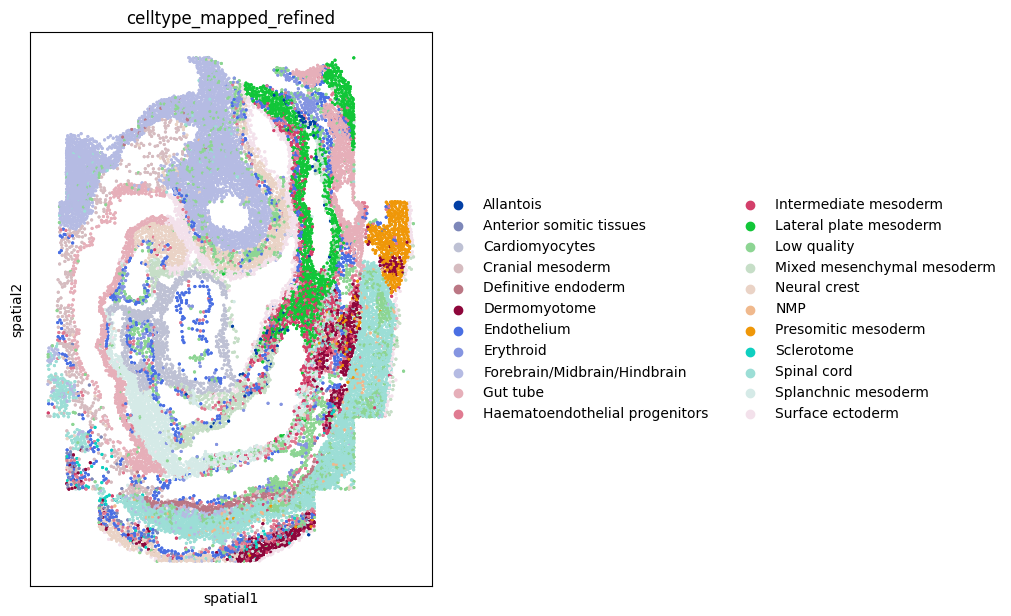

In [7]:
sq.pl.spatial_scatter(
    adata, color="celltype_mapped_refined", shape=None, figsize=(10, 10)
)

  0%|          | 0/1000 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


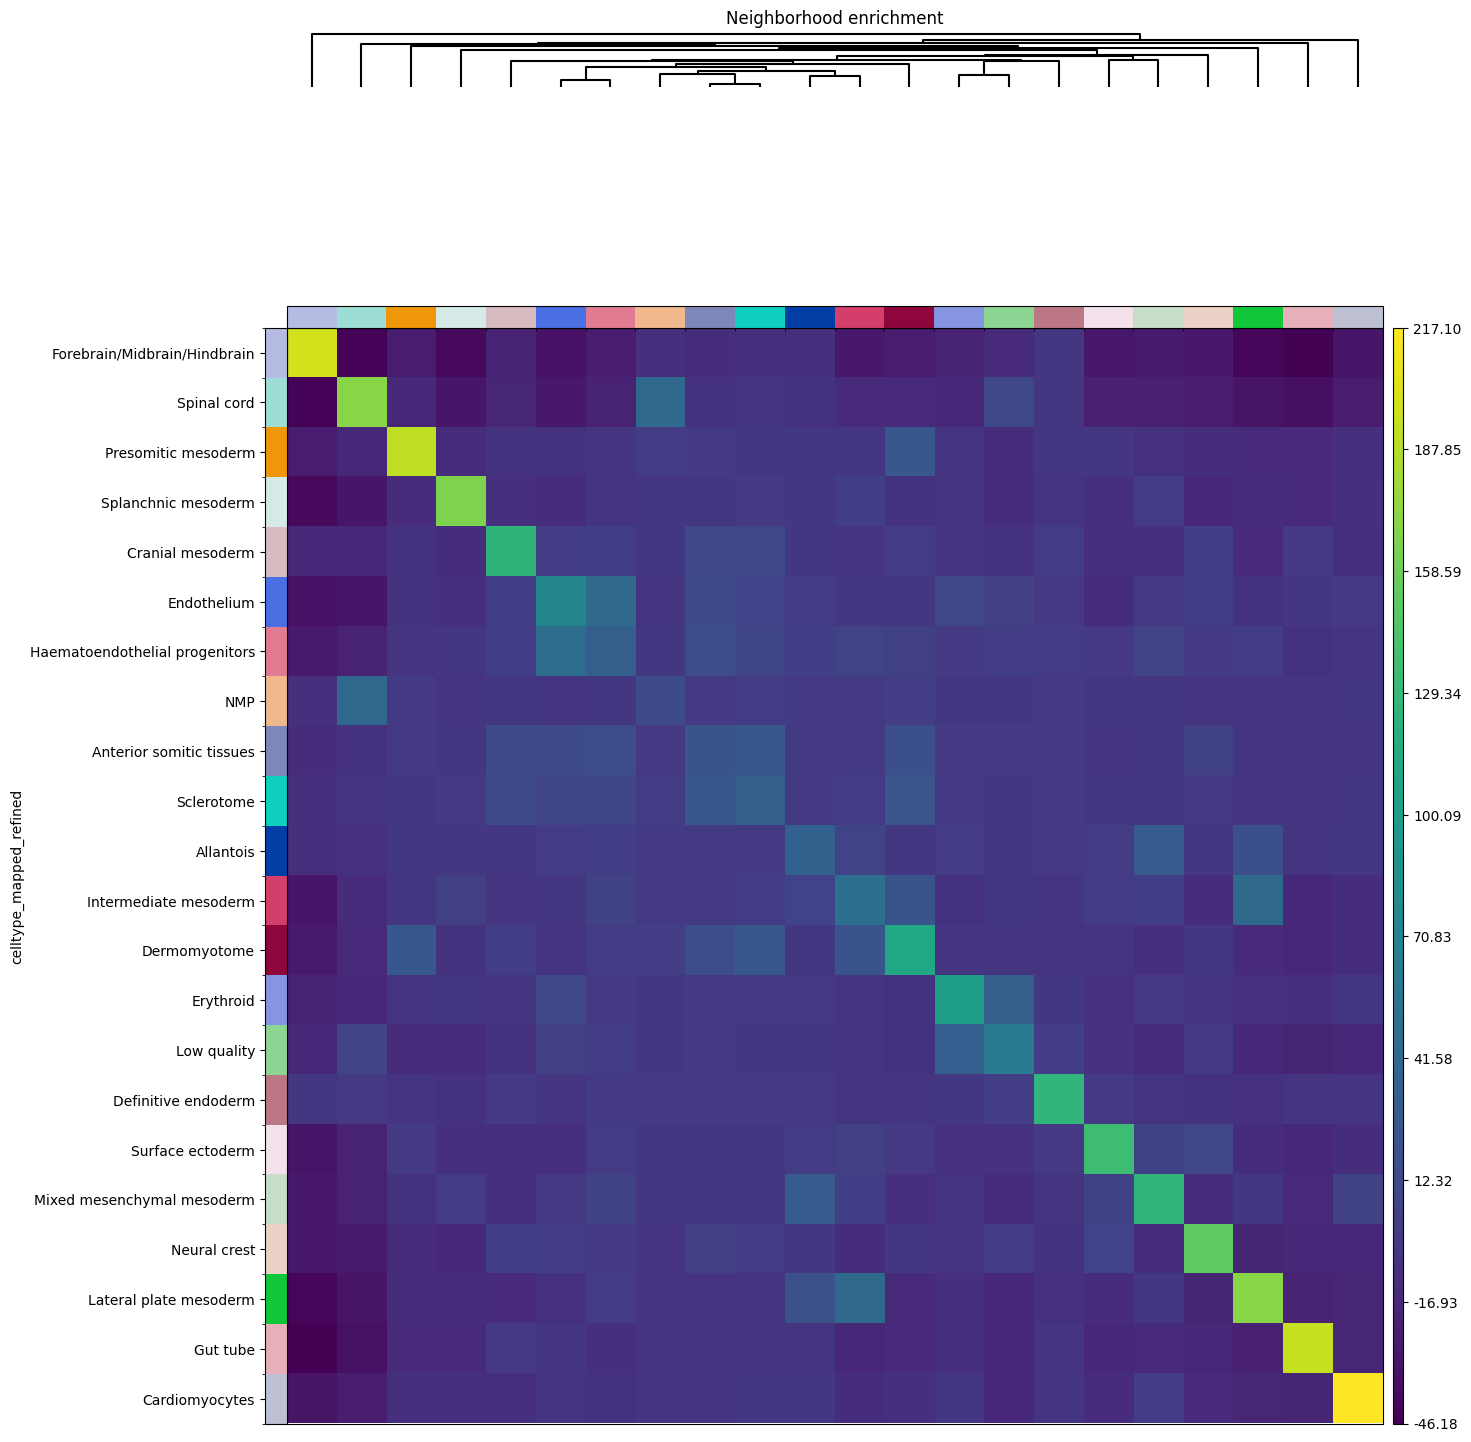

In [8]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


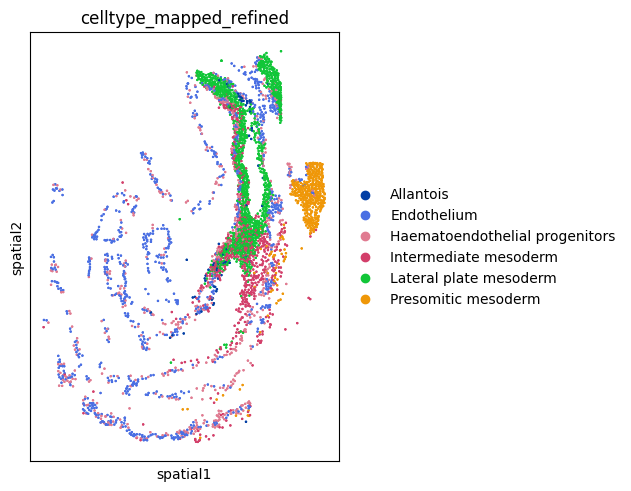

In [9]:
sq.pl.spatial_scatter(
    adata,
    color="celltype_mapped_refined",
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    ],
    shape=None,
    size=2,
)

  0%|          | 0/1 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


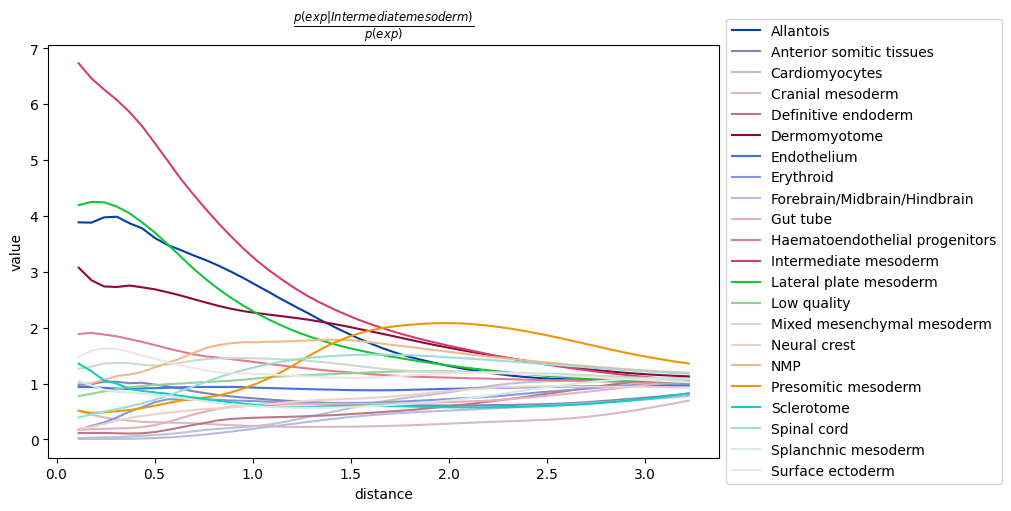

In [10]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Intermediate mesoderm",
    figsize=(10, 5),
)

In [11]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="celltype_mapped_refined",
)
sq.pl.ligrec(
    adata,
    cluster_key="celltype_mapped_refined",
    source_groups="Lateral plate mesoderm",
    target_groups=["Intermediate mesoderm", "Allantois"],
    means_range=(0.3, np.inf),
    alpha=1e-4,
    swap_axes=True,
)

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

  0%|          | 0/100 [00:00<?, ?permutation/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


ValueError: After removing rows with only NaN interactions, none remain.

In [23]:
print(adata)
print(adata.obs['celltype_mapped_refined'].value_counts())

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors', 'spatial_neighbors', 'celltype_mapped_refined_nhood_enrichment', 'celltype_mapped_refined_co_occurrence', 'celltype_mapped_refined_ligrec'
    obsm: 'X_umap', 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'
celltype_mapped_refined
Forebrain/Midbrain/Hindbrain      3704
Spinal cord                       2620
Low quality                       1645
Gut tube                          1464
Lateral plate mesoderm            1243
Splanchnic mesoderm               1138
Endothelium                        953
Neural crest                       912
Surface ectoderm                   801
Cardiomyocytes                     737
Haematoendothelial progenitors     637
Intermediate mesoderm              623
Mixed mesenchymal mesoderm         541
Cranial mesoderm                   528
Dermomyotome                       523
Presomitic mesoderm            

In [25]:
print(adata.obs.head())
print(adata.uns.keys())


                          Area celltype_mapped_refined
embryo1_Pos0_cell10_z2   10400             Low quality
embryo1_Pos0_cell10_z5    2256  Lateral plate mesoderm
embryo1_Pos0_cell100_z2   8144               Erythroid
embryo1_Pos0_cell100_z5   6592  Lateral plate mesoderm
embryo1_Pos0_cell101_z2   8560               Erythroid
dict_keys(['celltype_mapped_refined_colors', 'spatial_neighbors', 'celltype_mapped_refined_nhood_enrichment', 'celltype_mapped_refined_co_occurrence', 'celltype_mapped_refined_ligrec'])


In [26]:
print(adata.obs['celltype_mapped_refined'].value_counts())


celltype_mapped_refined
Forebrain/Midbrain/Hindbrain      3704
Spinal cord                       2620
Low quality                       1645
Gut tube                          1464
Lateral plate mesoderm            1243
Splanchnic mesoderm               1138
Endothelium                        953
Neural crest                       912
Surface ectoderm                   801
Cardiomyocytes                     737
Haematoendothelial progenitors     637
Intermediate mesoderm              623
Mixed mesenchymal mesoderm         541
Cranial mesoderm                   528
Dermomyotome                       523
Presomitic mesoderm                458
Erythroid                          300
Definitive endoderm                213
Anterior somitic tissues           112
NMP                                109
Sclerotome                          78
Allantois                           77
Name: count, dtype: int64


In [29]:
import scanpy as sc
import squidpy as sq
import numpy as np

# Perform the ligand-receptor analysis
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="celltype_mapped_refined",
)

# Check if the results are present in the adata object
if 'celltype_mapped_refined_ligrec' in adata.uns:
    ligrec_results = adata.uns['celltype_mapped_refined_ligrec']
    if ligrec_results:  # Check if the dictionary is not empty
        print("Ligand-Receptor results found:", ligrec_results)

        # Plotting the results if means are present
        if 'means' in ligrec_results:
            sq.pl.ligrec(
                adata,
                cluster_key="celltype_mapped_refined",
                source_groups="Lateral plate mesoderm",
                target_groups=["Intermediate mesoderm", "Allantois"],
                means_range=(0.3, np.inf),
                alpha=1e-4,
                swap_axes=True,
            )
        else:
            print("No 'means' key found in the ligand-receptor results.")
    else:
        print("Ligand-Receptor analysis did not return any results.")
else:
    print("Key 'celltype_mapped_refined_ligrec' not found in adata.uns. Check the input data and parameters.")


  0%|          | 0/100 [00:00<?, ?permutation/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Ligand-Receptor results found: {'means': cluster_1     Allantois                                          \
cluster_2     Allantois Anterior somitic tissues Cardiomyocytes   
source target                                                     
KDR    PECAM1  0.142857                 0.294237       0.150901   
IGF1   KDR     0.162338                 0.484172       0.250242   
PDGFA  KDR     0.240260                 0.562094       0.328164   
NRP1   KDR     0.532468                 0.854302       0.620372   
FGF3   FGFR3   0.324675                 0.162744       0.288913   
...                 ...                      ...            ...   
FGFR4  CDH2    0.681818                 0.636769       1.359953   
CXCL12 ITGA4   0.331169                 0.416802       0.328067   
THBS1  ITGA4   0.331169                 0.416802       0.328067   
APLN   APLNR   0.279221                 0.402597       0.268366   
VCAM1  VCAM1   0.181818                 0.220373       0.324966   

cluster_1           

ValueError: After removing rows with only NaN interactions, none remain.

In [30]:
# Check if the initial results contain valid interactions
if 'means' in adata.uns['celltype_mapped_refined_ligrec']:
    print(adata.uns['celltype_mapped_refined_ligrec']['means'])
else:
    print("No 'means' key found in the ligand-receptor results.")


cluster_1     Allantois                                          \
cluster_2     Allantois Anterior somitic tissues Cardiomyocytes   
source target                                                     
KDR    PECAM1  0.142857                 0.294237       0.150901   
IGF1   KDR     0.162338                 0.484172       0.250242   
PDGFA  KDR     0.240260                 0.562094       0.328164   
NRP1   KDR     0.532468                 0.854302       0.620372   
FGF3   FGFR3   0.324675                 0.162744       0.288913   
...                 ...                      ...            ...   
FGFR4  CDH2    0.681818                 0.636769       1.359953   
CXCL12 ITGA4   0.331169                 0.416802       0.328067   
THBS1  ITGA4   0.331169                 0.416802       0.328067   
APLN   APLNR   0.279221                 0.402597       0.268366   
VCAM1  VCAM1   0.181818                 0.220373       0.324966   

cluster_1                                                    

In [31]:
# Adjust the filtering parameters
sq.pl.ligrec(
    adata,
    cluster_key="celltype_mapped_refined",
    source_groups="Lateral plate mesoderm",
    target_groups=["Intermediate mesoderm", "Allantois"],
    means_range=(0, np.inf),  # Broaden the range to include more interactions
    alpha=1e-2,  # Increase alpha to make the filtering less stringent
    swap_axes=True,
)


ValueError: After removing rows with only NaN interactions, none remain.

In [33]:
# Inspect for NaN values
interaction_means = adata.uns['celltype_mapped_refined_ligrec']['means']
print(interaction_means.isna().sum())

# If NaN values are present, consider imputing or handling them
# Example: Fill NaN values with zero (not always appropriate, but an example step)
adata.uns['celltype_mapped_refined_ligrec']['means'].fillna(0, inplace=True)


cluster_1         cluster_2               
Allantois         Allantois                   False
                  Anterior somitic tissues    False
                  Cardiomyocytes              False
                  Cranial mesoderm            False
                  Definitive endoderm         False
                                              ...  
Surface ectoderm  Presomitic mesoderm         False
                  Sclerotome                  False
                  Spinal cord                 False
                  Splanchnic mesoderm         False
                  Surface ectoderm            False
Length: 484, dtype: Sparse[bool, False]


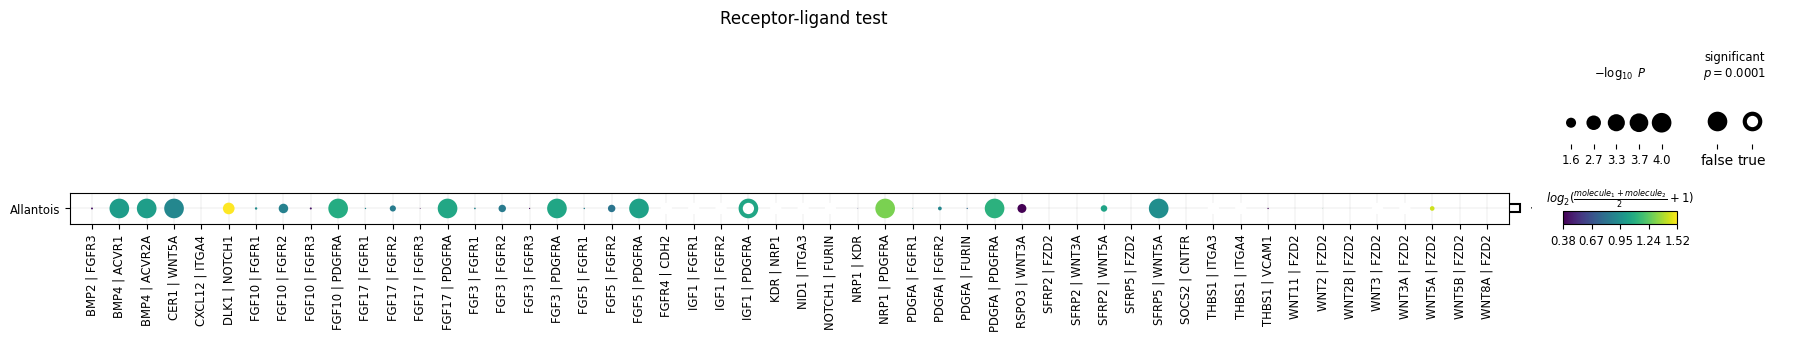

In [46]:
sq.pl.ligrec(
                adata,
                cluster_key="celltype_mapped_refined",
                source_groups="Allantois",
                target_groups=["Intermediate mesoderm", "Allantois"],
                means_range=(0.3, np.inf),
                alpha=1e-4,
                swap_axes=True,
            )